## Importing the relevant libraries

In [ ]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings, gc
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DATN/data/vietnam_weather_daily_latlong.csv')
df.head()

Mounted at /content/drive


,date,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),dew_point_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),...,wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),surface_pressure_mean (hPa),pressure_msl_mean (hPa),daylight_duration (s),sunshine_duration (s),weather_code (wmo code),latitude,longitude
0,2020-01-01,27.9,32.9,23.9,28.6,33.5,24.9,18.1,0.0,0.0,...,34.0,17.1,70,1013.3,1014.1,41751.15,38584.04,3,9.173989,105.129980
1,2020-01-01,27.5,32.0,23.4,28.1,32.7,24.6,18.5,0.0,0.0,...,38.0,19.1,66,1013.7,1014.2,41721.83,38335.00,3,9.314587,105.703125
2,2020-01-01,26.8,30.8,22.2,27.8,31.6,24.1,18.8,0.0,0.0,...,33.4,16.7,67,1013.3,1014.3,41663.12,38320.22,3,9.595782,105.993034
3,2020-01-01,26.9,31.7,22.3,28.3,33.3,24.1,18.7,0.0,0.0,...,28.0,14.3,73,1013.8,1014.3,41648.43,38215.91,3,9.666080,105.536190
4,2020-01-01,26.5,30.2,21.8,28.3,32.1,24.4,19.7,0.0,0.0,...,29.4,15.5,70,1013.7,1014.3,41589.61,38011.42,3,9.947276,106.377950


In [ ]:
df.shape

(115101, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115101 entries, 0 to 115100
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            115101 non-null  object 
 1   temperature_2m_mean (°C)        115101 non-null  float64
 2   temperature_2m_max (°C)         115101 non-null  float64
 3   temperature_2m_min (°C)         115101 non-null  float64
 4   apparent_temperature_mean (°C)  115101 non-null  float64
 5   apparent_temperature_max (°C)   115101 non-null  float64
 6   apparent_temperature_min (°C)   115101 non-null  float64
 7   dew_point_2m_mean (°C)          115101 non-null  float64
 8   precipitation_sum (mm)          115101 non-null  float64
 9   rain_sum (mm)                   115101 non-null  float64
 10  snowfall_sum (cm)               115101 non-null  float64
 11  cloud_cover_mean (%)            115101 non-null  int64  
 12  relative_humidit

In [ ]:
df.describe()

,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),dew_point_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),...,wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),surface_pressure_mean (hPa),pressure_msl_mean (hPa),daylight_duration (s),sunshine_duration (s),weather_code (wmo code),latitude,longitude
count,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.0,...,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000,115101.000000
mean,25.074765,29.123903,21.985847,28.669666,33.355380,25.217428,21.152149,6.083348,6.083348,0.0,...,20.294583,8.913157,152.197131,996.452436,1010.665000,43691.810071,29940.421939,43.458901,16.066616,106.413327
std,4.137683,4.545753,4.260064,6.170504,6.675523,6.395342,4.564801,11.658426,11.658426,0.0,...,7.349311,4.169262,92.070928,30.556621,5.198302,2520.624667,13028.555913,24.298046,4.882630,1.338626
min,5.100000,6.000000,3.000000,0.000000,1.100000,-2.500000,-6.300000,0.000000,0.000000,0.0,...,5.500000,1.600000,0.000000,846.800000,984.400000,38637.490000,0.000000,0.000000,9.173989,103.105910
25%,23.000000,26.700000,19.900000,25.400000,29.500000,21.800000,19.100000,0.000000,0.000000,0.0,...,15.100000,5.900000,85.000000,1000.100000,1007.500000,41685.790000,23284.290000,3.000000,10.931458,105.703125
50%,26.200000,30.000000,23.300000,30.500000,34.900000,27.300000,22.700000,1.400000,1.400000,0.0,...,18.600000,8.000000,137.000000,1007.200000,1010.000000,43705.440000,35580.880000,53.000000,16.063269,106.207245
75%,27.700000,32.100000,24.900000,33.000000,38.200000,29.800000,24.400000,7.800000,7.800000,0.0,...,23.800000,11.100000,221.000000,1010.500000,1013.500000,45663.240000,39538.820000,63.000000,21.054480,107.138760
max,35.600000,42.900000,32.200000,41.000000,48.800000,37.100000,28.600000,571.800000,571.800000,0.0,...,98.700000,52.000000,360.000000,1029.800000,1032.200000,48724.820000,44975.680000,65.000000,22.811949,109.262290


In [ ]:
df.isna().sum()

,0
date,0
temperature_2m_mean (°C),0
temperature_2m_max (°C),0
temperature_2m_min (°C),0
apparent_temperature_mean (°C),0
apparent_temperature_max (°C),0
apparent_temperature_min (°C),0
dew_point_2m_mean (°C),0
precipitation_sum (mm),0
rain_sum (mm),0


In [ ]:
df.columns = (
    df.columns
      .str.replace(r'\s*\(.*?\)', '', regex=True)  # xóa (đơn vị)
      .str.replace('Â', '', regex=False)            # xóa ký tự lỗi
      .str.strip()                                  # xóa space đầu/cuối
)

In [ ]:
df.isna().sum()

,0
date,0
temperature_2m_mean,0
temperature_2m_max,0
temperature_2m_min,0
apparent_temperature_mean,0
apparent_temperature_max,0
apparent_temperature_min,0
dew_point_2m_mean,0
precipitation_sum,0
rain_sum,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

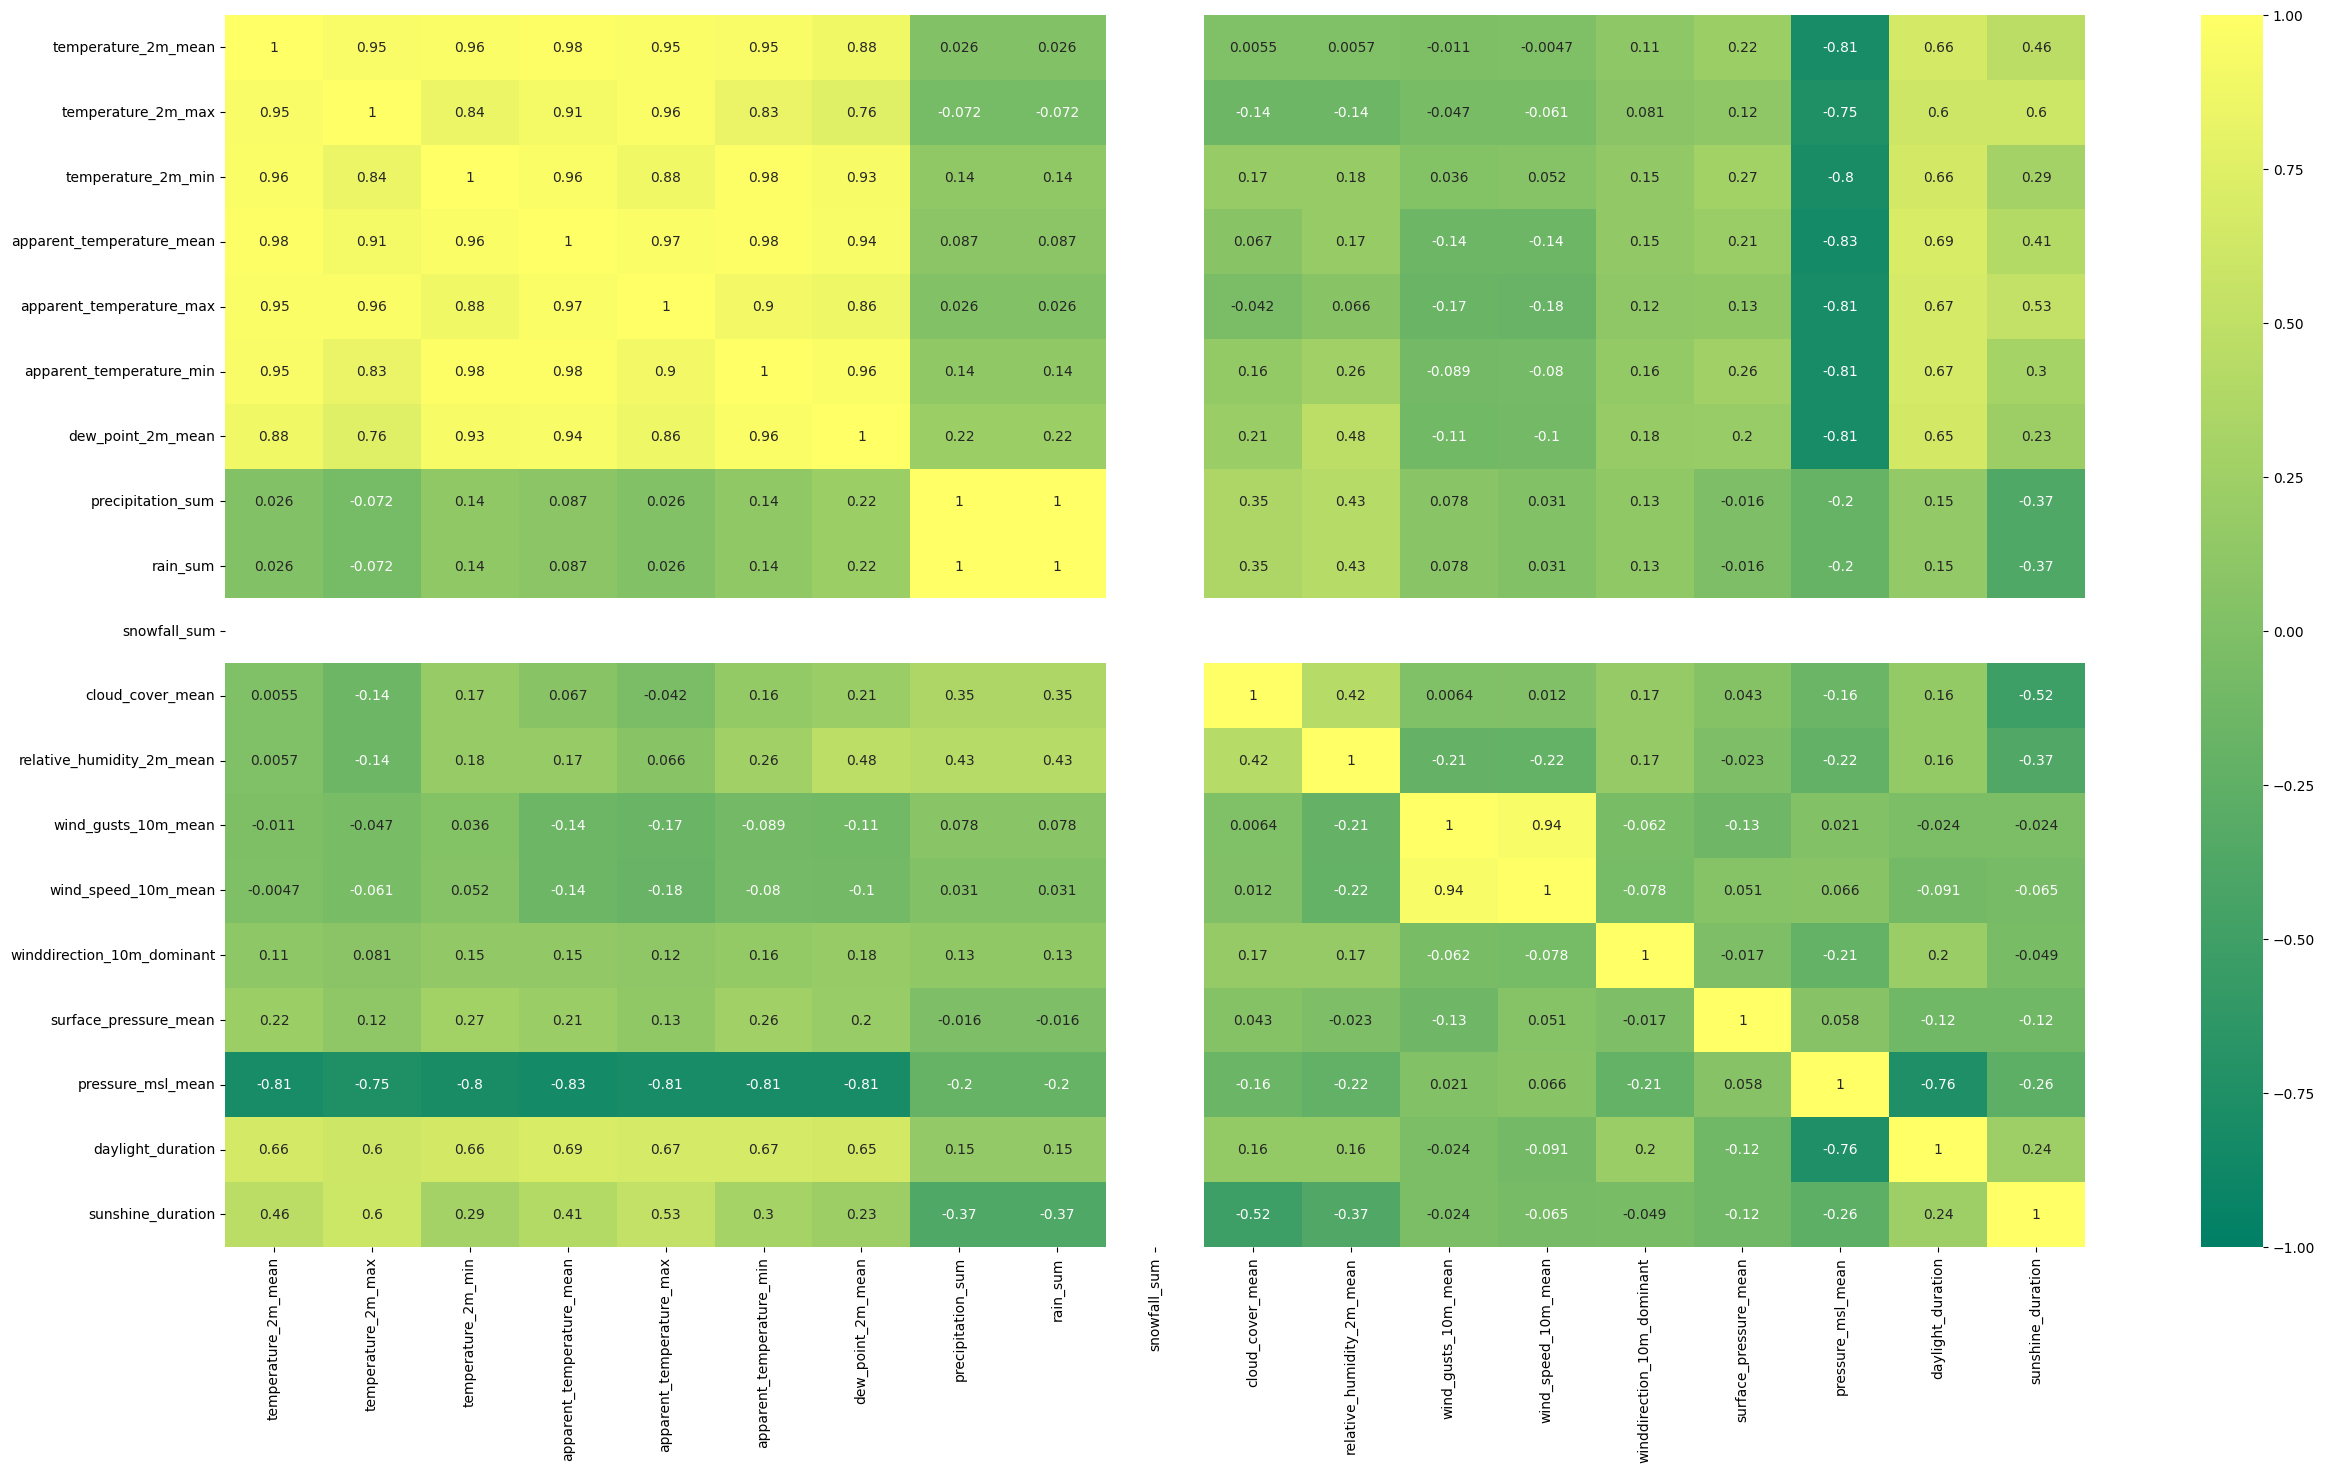

25580

In [ ]:
selected_columns = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'dew_point_2m_mean',
                    'precipitation_sum', 'rain_sum', 'snowfall_sum', 'cloud_cover_mean', 'relative_humidity_2m_mean', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'winddirection_10m_dominant',
                    'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration', 'sunshine_duration']

plt.figure(figsize=(30,16))
fig = sns.heatmap(df[selected_columns].corr(),annot=True,cmap='summer',vmin=-1.0,vmax=1.0)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

## Feature Engineering

### Feature Extraction

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print(df['date'].dtype)          # datetime64[ns]
print(df['date'].isna().sum())   # 0

datetime64[ns]
0


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df['dayofyear'] = df['date'].dt.dayofyear
df['sin_doy'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
df['cos_doy'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

df = df.sort_values(['date']).reset_index(drop=True)

In [ ]:
df = df.drop(columns=['date','dayofyear'])

In [ ]:
random_row = df.iloc[[0]]
with pd.option_context('display.max_columns', None):
    print(random_row)

   temperature_2m_mean  temperature_2m_max  temperature_2m_min  \
0                 27.9                32.9                23.9   

   apparent_temperature_mean  apparent_temperature_max  \
0                       28.6                      33.5   

   apparent_temperature_min  dew_point_2m_mean  precipitation_sum  rain_sum  \
0                      24.9               18.1                0.0       0.0   

   snowfall_sum  cloud_cover_mean  relative_humidity_2m_mean  \
0           0.0                80                         56   

   wind_gusts_10m_mean  wind_speed_10m_mean  winddirection_10m_dominant  \
0                 34.0                 17.1                          70   

   surface_pressure_mean  pressure_msl_mean  daylight_duration  \
0                 1013.3             1014.1           41751.15   

   sunshine_duration  weather_code  latitude  longitude  year  month  day  \
0           38584.04             3  9.173989  105.12998  2020      1    1   

    sin_doy   cos_doy  

### Outlier Treatment

In [ ]:
# skewed_cols = ['humidity']

# def remove_outliers(data,col):
#     lower_limit, upper_limit = data[col].quantile([0.25,0.75])
#     IQR = upper_limit - lower_limit
#     lower_whisker = lower_limit - 1.5 * IQR
#     upper_whisker = upper_limit + 1.5 * IQR
#     return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [ ]:
# for col in skewed_cols:
#     df[col] = remove_outliers(df,col)

In [ ]:
# fig = sns.boxplot(df['humidity'], palette='summer')
# plt.show(fig)
# plt.close('all')
# del fig
# gc.collect();

### Feature Splitting

In [ ]:
df.columns

Index(['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'dew_point_2m_mean', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'cloud_cover_mean',
       'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
       'wind_speed_10m_mean', 'winddirection_10m_dominant',
       'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
       'sunshine_duration', 'weather_code', 'latitude', 'longitude', 'year',
       'month', 'day', 'sin_doy', 'cos_doy'],
      dtype='object')

In [ ]:
features = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
            'apparent_temperature_mean', 'apparent_temperature_max',
            'apparent_temperature_min', 'dew_point_2m_mean', 'precipitation_sum',
            'rain_sum', 'snowfall_sum', 'cloud_cover_mean',
            'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
            'wind_speed_10m_mean', 'winddirection_10m_dominant',
            'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
            'sunshine_duration', 'latitude', 'longitude', 'sin_doy', 'cos_doy']

df = df.sort_values(['latitude', 'longitude', 'year', 'month', 'day'])

# ===== Feature cho LSTM (dynamic) =====
SEQ_FEATURES = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
                'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
                'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean',
                'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
                'wind_speed_10m_mean', 'winddirection_10m_dominant',
                'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
                'sunshine_duration', 'sin_doy', 'cos_doy'
]

# ===== Feature dùng để group city =====
CITY_FEATURES = ['latitude', 'longitude']

In [ ]:
Y_FEATURES = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
              'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
              'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean',
              'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
              'wind_speed_10m_mean', 'winddirection_10m_dominant',
              'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
              'sunshine_duration'
]


### Train Test Split

In [ ]:
def split_train_val_by_city(
    df,
    city_cols,
    split_ratio=0.8,
    input_window=30
):
    train_parts, val_parts = [], []

    for _, g in df.groupby(city_cols):
        g = g.sort_values(['year', 'month', 'day'])
        split = int(len(g) * split_ratio)

        # chặn overlap window
        train_parts.append(g.iloc[:split - input_window])
        val_parts.append(g.iloc[split:])

    return (
        pd.concat(train_parts).reset_index(drop=True),
        pd.concat(val_parts).reset_index(drop=True)
    )



In [ ]:
df_train_raw, df_val_raw = split_train_val_by_city(
    df,
    city_cols=CITY_FEATURES,
    split_ratio=0.8,
    input_window=30
)

### Feature Scaling

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaler_x.fit(df_train_raw[SEQ_FEATURES])
scaler_y.fit(df_train_raw[Y_FEATURES])


StandardScaler()

In [ ]:
# CHECK BẮT BUỘC
print("Y mean:", scaler_y.mean_[:5])
print("Y scale:", scaler_y.scale_[:5])

Y mean: [25.01649196 29.02789924 21.9459297  28.60909787 33.26780362]
Y scale: [4.11236371 4.47939667 4.2652857  6.14532629 6.6080935 ]


In [ ]:
import joblib

joblib.dump(scaler_x, "/content/drive/MyDrive/DATN/source/model_7day/scaler_x.joblib")
joblib.dump(scaler_y, "/content/drive/MyDrive/DATN/source/model_7day/scaler_y.joblib")


['/content/drive/MyDrive/DATN/source/model_7day/scaler_y.joblib']

In [ ]:
df_train = df_train_raw.copy()
df_val   = df_val_raw.copy()

df_train[SEQ_FEATURES] = scaler_x.transform(df_train_raw[SEQ_FEATURES])
df_train[Y_FEATURES]   = scaler_y.transform(df_train_raw[Y_FEATURES])

df_val[SEQ_FEATURES] = scaler_x.transform(df_val_raw[SEQ_FEATURES])
df_val[Y_FEATURES]   = scaler_y.transform(df_val_raw[Y_FEATURES])

In [ ]:
random_row = df_train.iloc[[0]]
with pd.option_context('display.max_columns', None):
    print(random_row)

   temperature_2m_mean  temperature_2m_max  temperature_2m_min  \
0              0.70118            0.864425            0.458134   

   apparent_temperature_mean  apparent_temperature_max  \
0                   -0.00148                  0.035138   

   apparent_temperature_min  dew_point_2m_mean  precipitation_sum  rain_sum  \
0                 -0.041848          -0.671424           -0.52518       0.0   

   snowfall_sum  cloud_cover_mean  relative_humidity_2m_mean  \
0           0.0          0.248046                   -2.61688   

   wind_gusts_10m_mean  wind_speed_10m_mean  winddirection_10m_dominant  \
0             1.848494             1.973337                   -0.903055   

   surface_pressure_mean  pressure_msl_mean  daylight_duration  \
0               0.553782             0.6859          -0.808526   

   sunshine_duration  weather_code  latitude  longitude  year  month  day  \
0           0.659194             3  9.173989  105.12998  2020      1    1   

    sin_doy   cos_doy  

In [ ]:
row_max = df_train.loc[df_train['winddirection_10m_dominant'].idxmax()]

with pd.option_context('display.max_columns', None):
    print(row_max)


temperature_2m_mean              0.117574
temperature_2m_max               0.172367
temperature_2m_min              -0.127994
apparent_temperature_mean       -0.001480
apparent_temperature_max         0.156202
apparent_temperature_min        -0.323065
dew_point_2m_mean               -0.143500
precipitation_sum               -0.525180
rain_sum                         0.000000
snowfall_sum                     0.000000
cloud_cover_mean                 0.325902
relative_humidity_2m_mean       -0.708952
wind_gusts_10m_mean             -0.214603
wind_speed_10m_mean              0.095456
winddirection_10m_dominant       2.255467
surface_pressure_mean            0.475221
pressure_msl_mean                0.157117
daylight_duration               -0.830713
sunshine_duration                0.629173
weather_code                     3.000000
latitude                         9.666080
longitude                      105.536190
year                          2020.000000
month                           12

In [ ]:
def create_sequences_by_city(
    df,
    city_cols=('latitude', 'longitude'),
    input_window=30,
    output_window=7,
    seq_features=None,
    y_features=None
):
    X, y = [], []

    for _, g in df.groupby(list(city_cols)):
        g = g.sort_values(['year', 'month', 'day'])

        if len(g) < input_window + output_window:
            continue

        seq_data = g[seq_features].values
        y_data = g[y_features].values

        for i in range(len(g) - input_window - output_window + 1):
            X.append(seq_data[i:i + input_window])
            y.append(y_data[i + input_window:i + input_window + output_window])

    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = create_sequences_by_city(
    df_train,
    city_cols=CITY_FEATURES,
    input_window=30,
    output_window=7,
    seq_features=SEQ_FEATURES,
    y_features=Y_FEATURES
)

X_val, y_val = create_sequences_by_city(
    df_val,
    city_cols=CITY_FEATURES,
    input_window=30,
    output_window=7,
    seq_features=SEQ_FEATURES,
    y_features=Y_FEATURES
)

print("X shape:", X_train.shape)  # (samples, 30, len(SEQ_FEATURES))
print("y shape:", y_train.shape)  # (samples, 7, len(Y_FEATURES))
print("X shape:", X_val.shape)  # (samples, 30, len(SEQ_FEATURES))
print("y shape:", y_val.shape)  # (samples, 7, len(Y_FEATURES))


X shape: (87885, 30, 19)
y shape: (87885, 7, 17)
X shape: (20790, 30, 19)
y shape: (20790, 7, 17)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30, X_train.shape[2])),

    tf.keras.layers.LSTM(
        64,
        return_sequences=True,
        kernel_regularizer=l2(1e-4)
    ),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(
        32,
        kernel_regularizer=l2(1e-4)
    ),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(7 * len(Y_FEATURES)),
    tf.keras.layers.Reshape((7, len(Y_FEATURES)))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=3e-4,
        clipnorm=1.0
    ),
    loss=tf.keras.losses.Huber(delta=1.0),
    metrics=['mae']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 119)            │         3,927 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 17)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,847 (147.84 KB)

 Trainable params: 37,847 (147.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    shuffle=False,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_mae',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_mae',
            factor=0.3,
            patience=1,
            min_lr=1e-5
        )
    ],
    verbose=1
)

Epoch 1/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 113s 39ms/step - loss: 0.1877 - mae: 0.4572 - val_loss: 0.2682 - val_mae: 0.5737 - learning_rate: 3.0000e-04
Epoch 2/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 100s 37ms/step - loss: 0.1578 - mae: 0.4042 - val_loss: 0.2491 - val_mae: 0.5475 - learning_rate: 3.0000e-04
Epoch 3/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 98s 36ms/step - loss: 0.1501 - mae: 0.3919 - val_loss: 0.2392 - val_mae: 0.5358 - learning_rate: 3.0000e-04
Epoch 4/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 146s 37ms/step - loss: 0.1461 - mae: 0.3858 - val_loss: 0.2393 - val_mae: 0.5367 - learning_rate: 3.0000e-04
Epoch 5/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 143s 37ms/step - loss: 0.1503 - mae: 0.3960 - val_loss: 0.2102 - val_mae: 0.4942 - learning_rate: 9.0000e-05
Epoch 6/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 101s 37ms/step - loss: 0.1441 - mae: 0.3847 - val_loss: 0.2033 - val_mae: 0.4832 - learning_rate: 9.0000e-05
Epoch 7/100
2747/2747 ━━━━━━━━━━━━━━━━━━━━ 101s 37ms/step - loss: 0.1418 - mae: 0.3807 - 

In [ ]:
print("Train y range:", y_train.min(), y_train.max())
print("Val y range  :", y_val.min(), y_val.max())


Train y range: -6.038649418414488 48.092022997767344
Val y range  : -5.1307132527767125 22.389014156900586


In [ ]:
print("Train std:", y_train.std(axis=(0, 1)))
print("Val std  :", y_val.std(axis=(0, 1)))


Train std: [0.9935572  0.99356085 0.99379242 0.99416239 0.99446265 0.99412628
 0.99473157 1.00658036 0.9968656  0.99759725 0.99812378 0.9987109
 1.0016679  0.99943028 0.99723218 0.98990906 1.00057597]
Val std  : [0.90532216 0.95049148 0.88302255 0.90296291 0.93575131 0.89117336
 0.89870068 1.01713445 1.0376214  1.02086089 0.95892882 0.99398066
 0.99550651 0.9937428  0.96792779 0.96725112 0.9932446 ]


In [ ]:
# dự đoán
train_pred = model.predict(X_train)

# MAE theo từng feature (gộp samples + days)
mae_per_feature = np.mean(
    np.abs(train_pred - y_train),
    axis=(0, 1)
)

for name, mae in zip(Y_FEATURES, mae_per_feature):
    print(f"{name:20s}: {mae:.4f}")

2747/2747 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step
temperature_2m_mean : 0.2478
temperature_2m_max  : 0.3353
temperature_2m_min  : 0.2424
apparent_temperature_mean: 0.2371
apparent_temperature_max: 0.3170
apparent_temperature_min: 0.2417
dew_point_2m_mean   : 0.2545
precipitation_sum   : 0.4657
cloud_cover_mean    : 0.6648
relative_humidity_2m_mean: 0.5008
wind_gusts_10m_mean : 0.5773
wind_speed_10m_mean : 0.5603
winddirection_10m_dominant: 0.6114
surface_pressure_mean: 0.1216
pressure_msl_mean   : 0.3659
daylight_duration   : 0.1081
sunshine_duration   : 0.6208


In [ ]:
# dự đoán
val_pred = model.predict(X_val)

# MAE theo từng feature (gộp samples + days)
mae_per_feature = np.mean(
    np.abs(val_pred - y_val),
    axis=(0, 1)
)

for name, mae in zip(Y_FEATURES, mae_per_feature):
    print(f"{name:20s}: {mae:.4f}")


650/650 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
temperature_2m_mean : 0.3211
temperature_2m_max  : 0.4180
temperature_2m_min  : 0.2875
apparent_temperature_mean: 0.3067
apparent_temperature_max: 0.3947
apparent_temperature_min: 0.2907
dew_point_2m_mean   : 0.2929
precipitation_sum   : 0.4909
cloud_cover_mean    : 0.6971
relative_humidity_2m_mean: 0.5507
wind_gusts_10m_mean : 0.5866
wind_speed_10m_mean : 0.5877
winddirection_10m_dominant: 0.6312
surface_pressure_mean: 0.1394
pressure_msl_mean   : 0.4268
daylight_duration   : 0.1262
sunshine_duration   : 0.6408


In [ ]:
y_pred = model.predict(X_val)

y_pred_inv = scaler_y.inverse_transform(
    y_pred.reshape(-1, y_pred.shape[-1])
).reshape(y_pred.shape)

y_true_inv = scaler_y.inverse_transform(
    y_val.reshape(-1, y_val.shape[-1])
).reshape(y_val.shape)

bias = (y_pred_inv - y_true_inv).mean(axis=(0,1))
for i, f in enumerate(Y_FEATURES):
    print(f"{f:20s}: {bias[i]:+.3f}")


650/650 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
temperature_2m_mean : -0.302
temperature_2m_max  : -0.433
temperature_2m_min  : -0.269
apparent_temperature_mean: -0.344
apparent_temperature_max: -0.450
apparent_temperature_min: -0.334
dew_point_2m_mean   : -0.104
precipitation_sum   : -1.443
cloud_cover_mean    : +0.861
relative_humidity_2m_mean: +0.972
wind_gusts_10m_mean : -0.564
wind_speed_10m_mean : -0.550
winddirection_10m_dominant: -10.480
surface_pressure_mean: +1.286
pressure_msl_mean   : +0.186
daylight_duration   : -42.049
sunshine_duration   : +1949.055


In [ ]:
model.save("/content/drive/MyDrive/DATN/source/model_7day/7day_model.keras")

### Hướng dẫn chuẩn bị dữ liệu đầu vào để dự đoán

Mô hình LSTM của chúng ta được huấn luyện để nhận vào một chuỗi dữ liệu 30 ngày liên tiếp của một địa điểm cụ thể để dự đoán 7 ngày tiếp theo.

Do đó, khi bạn muốn dự đoán cho một địa điểm mới hoặc dự đoán tiếp cho một địa điểm đã có, bạn cần chuẩn bị một `DataFrame` chứa đủ 30 ngày dữ liệu lịch sử gần nhất cho **đúng một cặp vĩ độ và kinh độ** (latitude, longitude) đó. `DataFrame` này phải chứa các cột dữ liệu tương ứng với `SEQ_FEATURES` mà mô hình mong đợi, bao gồm cả `latitude` và `longitude` (mặc dù `latitude` và `longitude` không được đưa trực tiếp vào LSTM nhưng chúng cần có mặt trong DataFrame để nhất quán với cách xử lý dữ liệu).

Cột `time` trong ví dụ của bạn sẽ được đổi tên thành `date` để phù hợp với định dạng đã sử dụng trong quá trình huấn luyện.

In [ ]:
# Tải các scaler và mô hình đã lưu
import joblib
import tensorflow as tf
import pandas as pd
import numpy as np

scaler_x = joblib.load("/content/scaler_x.joblib")
scaler_y = joblib.load("/content/scaler_y.joblib")
model = tf.keras.models.load_model("/content/7day_model.keras")

# Định nghĩa lại SEQ_FEATURES (phải khớp với SEQ_FEATURES đã dùng để train model)
SEQ_FEATURES = [
    'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
    'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
    'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean',
    'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
    'wind_speed_10m_mean', 'winddirection_10m_dominant',
    'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
    'sunshine_duration', 'sin_doy', 'cos_doy'
]

Y_FEATURES = [
    'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
    'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
    'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean',
    'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
    'wind_speed_10m_mean', 'winddirection_10m_dominant',
    'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
    'sunshine_duration'
]

In [ ]:
def process_input_for_prediction(input_df, scaler_x, input_window=30):
    """
    Xử lý DataFrame chứa `input_window` ngày dữ liệu cho một địa điểm cụ thể
    vào định dạng yêu cầu bởi mô hình LSTM để dự đoán.

    Args:
        input_df (pd.DataFrame): DataFrame chứa `input_window` hàng (ngày) dữ liệu lịch sử
                                 cho một địa điểm duy nhất. Nó phải chứa cột 'date' (hoặc 'time' được đổi tên thành 'date')
                                 và tất cả các đặc trưng trong `SEQ_FEATURES`.
        scaler_x (StandardScaler): StandardScaler đã được fit trên các đặc trưng `SEQ_FEATURES` của dữ liệu huấn luyện.
        input_window (int): Số bước thời gian (ngày) mà mô hình mong đợi làm đầu vào. Mặc định là 30.

    Returns:
        np.array: Một mảng NumPy 3D phù hợp cho dự đoán mô hình (1, input_window, num_features).
    Raises:
        ValueError: Nếu DataFrame đầu vào không chứa đúng số hàng hoặc thiếu các cột cần thiết.
    """

    if len(input_df) != input_window:
        raise ValueError(f"DataFrame đầu vào phải chứa chính xác {input_window} hàng (ngày). Đã nhận {len(input_df)}.")

    # Đổi tên cột 'time' thành 'date' nếu nó tồn tại
    if 'time' in input_df.columns:
        input_df = input_df.rename(columns={'time': 'date'})

    if 'date' not in input_df.columns:
        raise ValueError("DataFrame đầu vào phải có cột 'date' (hoặc 'time').")

    # Đảm bảo cột 'date' là datetime và trích xuất các đặc trưng theo thời gian
    input_df['date'] = pd.to_datetime(input_df['date'], errors='coerce')
    input_df['year'] = input_df['date'].dt.year
    input_df['month'] = input_df['date'].dt.month
    input_df['day'] = input_df['date'].dt.day
    input_df['dayofyear'] = input_df['date'].dt.dayofyear
    input_df['sin_doy'] = np.sin(2 * np.pi * input_df['dayofyear'] / 365)
    input_df['cos_doy'] = np.cos(2 * np.pi * input_df['dayofyear'] / 365)

    # Sắp xếp theo ngày để đảm bảo thứ tự chuỗi đúng
    input_df = input_df.sort_values('date').reset_index(drop=True)

    # Chọn chỉ các đặc trưng mà mô hình mong đợi (SEQ_FEATURES)
    # Kiểm tra xem tất cả SEQ_FEATURES có trong input_df không
    missing_features = [f for f in SEQ_FEATURES if f not in input_df.columns]
    if missing_features:
        raise ValueError(f"DataFrame đầu vào thiếu các đặc trưng sau: {missing_features}")

    processed_df = input_df[SEQ_FEATURES]

    # Chuẩn hóa các đặc trưng
    scaled_data = scaler_x.transform(processed_df)

    # Thay đổi hình dạng cho mô hình LSTM: (1, input_window, num_features)
    model_input = scaled_data.reshape(1, input_window, len(SEQ_FEATURES))

    return model_input

In [ ]:
def predict_weather_for_location(input_history_df, scaler_x, scaler_y, model, input_window=30):
    """
    Thực hiện dự đoán thời tiết 7 ngày tiếp theo cho một địa điểm dựa trên lịch sử 30 ngày.

    Args:
        input_history_df (pd.DataFrame): DataFrame chứa 30 ngày dữ liệu lịch sử cho một địa điểm duy nhất.
                                       Phải chứa cột 'date' (hoặc 'time') và các đặc trưng cần thiết.
        scaler_x (StandardScaler): StandardScaler đã được fit cho các đặc trưng đầu vào.
        scaler_y (StandardScaler): StandardScaler đã được fit cho các đặc trưng mục tiêu.
        model (tf.keras.Model): Mô hình LSTM đã được huấn luyện.
        input_window (int): Số ngày lịch sử làm đầu vào cho mô hình (mặc định là 30).

    Returns:
        pd.DataFrame: DataFrame chứa dự đoán 7 ngày tiếp theo với các giá trị đã được chuyển đổi ngược.
                      Các cột sẽ là Y_FEATURES.
    """
    # 1. Tiền xử lý dữ liệu đầu vào
    processed_input = process_input_for_prediction(
        input_history_df.copy(), # Sử dụng bản sao để tránh thay đổi df gốc
        scaler_x,
        input_window=input_window
    )

    # 2. Thực hiện dự đoán với mô hình
    scaled_predictions = model.predict(processed_input, verbose=0)
    print("Prediction shape:", scaled_predictions.shape)

    # 3. Chuyển đổi ngược các dự đoán về thang đo gốc
    unscaled_predictions = scaler_y.inverse_transform(
        scaled_predictions.reshape(-1, scaled_predictions.shape[-1])
    ).reshape(scaled_predictions.shape)

    # 4. Tạo DataFrame cho kết quả dự đoán
    # Giả định dự đoán là cho 7 ngày tiếp theo
    start_date = input_history_df['date'].max() + pd.Timedelta(days=1)
    prediction_dates = pd.date_range(start=start_date, periods=7)

    predictions_df = pd.DataFrame(
        unscaled_predictions[0], # Lấy kết quả cho batch đầu tiên (chỉ có 1 mẫu)
        columns=Y_FEATURES
    )
    predictions_df.insert(0, 'date', prediction_dates)

    return predictions_df

print("Hàm predict_weather_for_location đã được định nghĩa.")

Hàm predict_weather_for_location đã được định nghĩa.


### Ví dụ sử dụng hàm `predict_weather_for_location`

In [ ]:
import io
# Tạo dữ liệu dummy 30 ngày cho một địa điểm cụ thể
# Đây là nơi bạn sẽ thay thế bằng 30 ngày dữ liệu thực tế từ nguồn của bạn

dates = pd.date_range(start='2025-10-28', periods=30)

dummy_data = {
    'date': dates,
    'temperature_2m_mean': np.random.uniform(20, 30, 30),
    'temperature_2m_max': np.random.uniform(25, 35, 30),
    'temperature_2m_min': np.random.uniform(15, 25, 30),
    'apparent_temperature_mean': np.random.uniform(22, 32, 30),
    'apparent_temperature_max': np.random.uniform(27, 37, 30),
    'apparent_temperature_min': np.random.uniform(17, 27, 30),
    'dew_point_2m_mean': np.random.uniform(15, 25, 30),
    'precipitation_sum': np.random.uniform(0, 10, 30),
    'cloud_cover_mean': np.random.randint(0, 100, 30),
    'relative_humidity_2m_mean': np.random.randint(60, 95, 30),
    'wind_gusts_10m_mean': np.random.uniform(10, 40, 30),
    'wind_speed_10m_mean': np.random.uniform(5, 20, 30),
    'winddirection_10m_dominant': np.random.randint(0, 360, 30),
    'surface_pressure_mean': np.random.uniform(990, 1020, 30),
    'pressure_msl_mean': np.random.uniform(1000, 1030, 30),
    'daylight_duration': np.random.uniform(36000, 45000, 30),
    'sunshine_duration': np.random.uniform(10000, 35000, 30)
}
# Thêm latitude và longitude. Mặc dù không dùng trực tiếp trong SEQ_FEATURES,
# nếu bạn lấy dữ liệu từ nguồn có sẵn các cột này, bạn nên giữ chúng.
# Cần đảm bảo rằng các cột trong dummy_df khớp với các cột có trong dữ liệu huấn luyện (dù không được dùng làm SEQ_FEATURES).
# Nếu không có, bạn có thể bỏ qua hoặc thêm giá trị mặc định/giả.

dummy_df = pd.DataFrame(dummy_data)

# Gọi hàm dự đoán
forecast_df = predict_weather_for_location(
    dummy_df,
    scaler_x,
    scaler_y,
    model,
    input_window=30
)

print("\nDự đoán 7 ngày tiếp theo (giá trị đã được chuyển đổi ngược):")
display(forecast_df)

Prediction shape: (1, 7, 17)

Dự đoán 7 ngày tiếp theo (giá trị đã được chuyển đổi ngược):


,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,dew_point_2m_mean,precipitation_sum,cloud_cover_mean,relative_humidity_2m_mean,wind_gusts_10m_mean,wind_speed_10m_mean,winddirection_10m_dominant,surface_pressure_mean,pressure_msl_mean,daylight_duration,sunshine_duration
0,2025-11-27,21.969120,26.845360,17.878275,23.304693,28.484835,19.077974,15.927455,-1.922336,44.239704,70.975883,18.180958,8.044475,91.345154,1012.331543,1018.065308,39683.187500,35889.437500
1,2025-11-28,21.905317,26.816231,17.785110,23.179882,28.391415,18.931789,15.782022,-1.973236,43.963760,70.553429,18.203978,8.084991,91.476448,1012.430725,1018.115845,39681.542969,36076.488281
2,2025-11-29,21.845333,26.788935,17.692638,23.070456,28.303493,18.796848,15.678599,-2.003772,43.487312,70.303627,18.182144,8.074558,91.712715,1012.404602,1018.138245,39680.085938,36190.421875
3,2025-11-30,21.795660,26.772196,17.620911,22.984480,28.238361,18.692129,15.608867,-1.975507,43.536228,70.229912,18.165022,8.058759,91.955162,1012.440247,1018.141357,39680.207031,36270.125000
4,2025-12-01,21.765669,26.756302,17.574425,22.931284,28.187641,18.628870,15.594093,-1.904472,43.454407,70.233498,18.167021,8.052299,92.475075,1012.417358,1018.109436,39682.597656,36105.511719
5,2025-12-02,21.745523,26.736647,17.561914,22.900728,28.135593,18.607885,15.622562,-1.787737,43.753731,70.388443,18.207411,8.084788,92.869583,1012.379883,1018.055054,39685.746094,35839.898438
6,2025-12-03,21.728584,26.703455,17.563267,22.880877,28.082882,18.617521,15.677541,-1.630913,44.689705,70.677483,18.187790,8.038909,93.595551,1012.317627,1017.988770,39690.421875,35428.285156


In [ ]:
import joblib
import tensorflow as tf
import pandas as pd
import numpy as np

# Đường dẫn đến các file scaler và model của bạn
scaler_x = joblib.load("/content/drive/MyDrive/DATN/source/model_7day/scaler_x.joblib")
scaler_y = joblib.load("/content/drive/MyDrive/DATN/source/model_7day/scaler_y.joblib")
model = tf.keras.models.load_model("/content/drive/MyDrive/DATN/source/model_7day/7day_model.keras")

# Định nghĩa lại SEQ_FEATURES và Y_FEATURES (phải khớp với các feature đã dùng để train model)
SEQ_FEATURES = [
    'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
    'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
    'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean',
    'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
    'wind_speed_10m_mean', 'winddirection_10m_dominant',
    'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
    'sunshine_duration', 'sin_doy', 'cos_doy'
]

Y_FEATURES = [
    'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
    'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min',
    'dew_point_2m_mean', 'precipitation_sum', 'cloud_cover_mean',
    'relative_humidity_2m_mean', 'wind_gusts_10m_mean',
    'wind_speed_10m_mean', 'winddirection_10m_dominant',
    'surface_pressure_mean', 'pressure_msl_mean', 'daylight_duration',
    'sunshine_duration'
]

### Hàm tiền xử lý dữ liệu đầu vào

Hàm này sẽ chuẩn bị DataFrame 30 ngày của bạn thành định dạng phù hợp cho mô hình LSTM. Đảm bảo rằng DataFrame đầu vào của bạn có đủ 30 hàng và chứa tất cả các cột cần thiết (hoặc ít nhất là `SEQ_FEATURES` + `date`).

In [ ]:
def process_input_for_prediction(input_df, scaler_x, input_window=30):
    """
    Xử lý DataFrame chứa `input_window` ngày dữ liệu cho một địa điểm cụ thể
    vào định dạng yêu cầu bởi mô hình LSTM để dự đoán.

    Args:
        input_df (pd.DataFrame): DataFrame chứa `input_window` hàng (ngày) dữ liệu lịch sử
                                 cho một địa điểm duy nhất. Nó phải chứa cột 'date' (hoặc 'time' được đổi tên thành 'date')
                                 và tất cả các đặc trưng trong `SEQ_FEATURES`.
        scaler_x (StandardScaler): StandardScaler đã được fit trên các đặc trưng `SEQ_FEATURES` của dữ liệu huấn luyện.
        input_window (int): Số bước thời gian (ngày) mà mô hình mong đợi làm đầu vào. Mặc định là 30.

    Returns:
        np.array: Một mảng NumPy 3D phù hợp cho dự đoán mô hình (1, input_window, num_features).
    Raises:
        ValueError: Nếu DataFrame đầu vào không chứa đúng số hàng hoặc thiếu các cột cần thiết.
    """

    if len(input_df) != input_window:
        raise ValueError(f"DataFrame đầu vào phải chứa chính xác {input_window} hàng (ngày). Đã nhận {len(input_df)}.")

    # Đổi tên cột 'time' thành 'date' nếu nó tồn tại
    if 'time' in input_df.columns:
        input_df = input_df.rename(columns={'time': 'date'})

    if 'date' not in input_df.columns:
        raise ValueError("DataFrame đầu vào phải có cột 'date' (hoặc 'time').")

    # Đảm bảo cột 'date' là datetime và trích xuất các đặc trưng theo thời gian
    input_df['date'] = pd.to_datetime(input_df['date'], errors='coerce')
    input_df['year'] = input_df['date'].dt.year
    input_df['month'] = input_df['date'].dt.month
    input_df['day'] = input_df['date'].dt.day
    input_df['dayofyear'] = input_df['date'].dt.dayofyear
    input_df['sin_doy'] = np.sin(2 * np.pi * input_df['dayofyear'] / 365)
    input_df['cos_doy'] = np.cos(2 * np.pi * input_df['dayofyear'] / 365)

    # Sắp xếp theo ngày để đảm bảo thứ tự chuỗi đúng
    input_df = input_df.sort_values('date').reset_index(drop=True)

    # Chọn chỉ các đặc trưng mà mô hình mong đợi (SEQ_FEATURES)
    # Kiểm tra xem tất cả SEQ_FEATURES có trong input_df không
    missing_features = [f for f in SEQ_FEATURES if f not in input_df.columns]
    if missing_features:
        raise ValueError(f"DataFrame đầu vào thiếu các đặc trưng sau: {missing_features}. Vui lòng kiểm tra lại.")

    processed_df = input_df[SEQ_FEATURES]

    # Chuẩn hóa các đặc trưng
    scaled_data = scaler_x.transform(processed_df)

    # Thay đổi hình dạng cho mô hình LSTM: (1, input_window, num_features)
    model_input = scaled_data.reshape(1, input_window, len(SEQ_FEATURES))

    return model_input

### Hàm dự đoán thời tiết

Hàm này sẽ sử dụng mô hình đã tải và dữ liệu đầu vào đã được xử lý để đưa ra dự đoán 7 ngày tiếp theo.

In [ ]:
def predict_weather_for_location(input_history_df, scaler_x, scaler_y, model, input_window=30):
    """
    Thực hiện dự đoán thời tiết 7 ngày tiếp theo cho một địa điểm dựa trên lịch sử 30 ngày.

    Args:
        input_history_df (pd.DataFrame): DataFrame chứa 30 ngày dữ liệu lịch sử cho một địa điểm duy nhất.
                                       Phải chứa cột 'date' (hoặc 'time') và các đặc trưng cần thiết.
        scaler_x (StandardScaler): StandardScaler đã được fit cho các đặc trưng đầu vào.
        scaler_y (StandardScaler): StandardScaler đã được fit cho các đặc trưng mục tiêu.
        model (tf.keras.Model): Mô hình LSTM đã được huấn luyện.
        input_window (int): Số ngày lịch sử làm đầu vào cho mô hình (mặc định là 30).

    Returns:
        pd.DataFrame: DataFrame chứa dự đoán 7 ngày tiếp theo với các giá trị đã được chuyển đổi ngược.
                      Các cột sẽ là Y_FEATURES.
    """
    # 1. Tiền xử lý dữ liệu đầu vào
    processed_input = process_input_for_prediction(
        input_history_df.copy(), # Sử dụng bản sao để tránh thay đổi df gốc
        scaler_x,
        input_window=input_window
    )

    # 2. Thực hiện dự đoán với mô hình
    scaled_predictions = model.predict(processed_input, verbose=0)
    print("Prediction shape:", scaled_predictions.shape)

    # 3. Chuyển đổi ngược các dự đoán về thang đo gốc
    unscaled_predictions = scaler_y.inverse_transform(
        scaled_predictions.reshape(-1, scaled_predictions.shape[-1])
    ).reshape(scaled_predictions.shape)

    # 4. Tạo DataFrame cho kết quả dự đoán
    # Giả định dự đoán là cho 7 ngày tiếp theo
    start_date = input_history_df['date'].max() + pd.Timedelta(days=1)
    prediction_dates = pd.date_range(start=start_date, periods=7)

    predictions_df = pd.DataFrame(
        unscaled_predictions[0], # Lấy kết quả cho batch đầu tiên (chỉ có 1 mẫu)
        columns=Y_FEATURES
    )
    predictions_df.insert(0, 'date', prediction_dates)

    return predictions_df

### Ví dụ sử dụng hàm `predict_weather_for_location`

Đây là cách bạn có thể tạo một DataFrame dữ liệu giả (dummy data) cho 30 ngày lịch sử và sau đó sử dụng hàm `predict_weather_for_location` để nhận dự đoán.

In [ ]:
import io

# Tạo dữ liệu dummy 30 ngày cho một địa điểm cụ thể
# Đây là nơi bạn sẽ thay thế bằng 30 ngày dữ liệu thực tế từ nguồn của bạn

dates = pd.date_range(start='2025-10-28', periods=30)

dummy_data = {
    'date': dates,
    'temperature_2m_mean': np.random.uniform(20, 30, 30),
    'temperature_2m_max': np.random.uniform(25, 35, 30),
    'temperature_2m_min': np.random.uniform(15, 25, 30),
    'apparent_temperature_mean': np.random.uniform(22, 32, 30),
    'apparent_temperature_max': np.random.uniform(27, 37, 30),
    'apparent_temperature_min': np.random.uniform(17, 27, 30),
    'dew_point_2m_mean': np.random.uniform(15, 25, 30),
    'precipitation_sum': np.random.uniform(0, 10, 30),
    'cloud_cover_mean': np.random.randint(0, 100, 30),
    'relative_humidity_2m_mean': np.random.randint(60, 95, 30),
    'wind_gusts_10m_mean': np.random.uniform(10, 40, 30),
    'wind_speed_10m_mean': np.random.uniform(5, 20, 30),
    'winddirection_10m_dominant': np.random.randint(0, 360, 30),
    'surface_pressure_mean': np.random.uniform(990, 1020, 30),
    'pressure_msl_mean': np.random.uniform(1000, 1030, 30),
    'daylight_duration': np.random.uniform(36000, 45000, 30),
    'sunshine_duration': np.random.uniform(10000, 35000, 30),
    'latitude': [9.173989] * 30, # Giả định một vĩ độ
    'longitude': [105.129980] * 30 # Giả định một kinh độ
}
# Để đơn giản hóa ví dụ, thêm sin_doy và cos_doy vào dummy_data
# Trong thực tế, các giá trị này sẽ được tính toán trong process_input_for_prediction
# Tuy nhiên, để tránh lỗi nếu các giá trị này được mong đợi trong SEQ_FEATURES trước khi tính toán,
# chúng ta thêm chúng vào đây với giá trị tạm.
# Hàm process_input_for_prediction sẽ tính toán lại chúng dựa trên cột 'date'.

dummy_df = pd.DataFrame(dummy_data)

# Gọi hàm dự đoán
forecast_df = predict_weather_for_location(
    dummy_df,
    scaler_x,
    scaler_y,
    model,
    input_window=30
)

print("\nDự đoán 7 ngày tiếp theo (giá trị đã được chuyển đổi ngược):")
display(forecast_df)